In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import sklearn

In [4]:
raw_data=pd.read_csv(r"C:\Users\Diya\Desktop\SOCR-HeightWeight.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


array([[<AxesSubplot:title={'center':'Index'}>,
        <AxesSubplot:title={'center':'Height(Inches)'}>],
       [<AxesSubplot:title={'center':'Weight(Pounds)'}>, <AxesSubplot:>]],
      dtype=object)

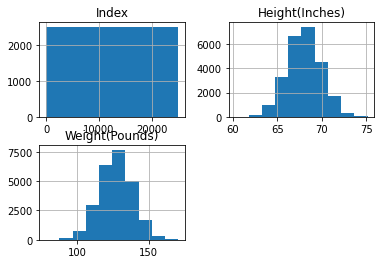

In [5]:
raw_data.hist()

In [30]:
cleaned_data = raw_data[raw_data > 0]
cleaned_data.rename(columns = {'Height(Inches)':'Height', 'Weight(Pounds)':'Weight'}, inplace = True)
cleaned_data.drop(['Index'], axis = 1, inplace = True) #drop Index column and make the change in place
cleaned_data.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


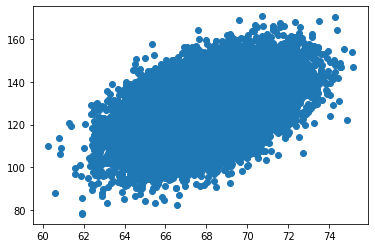

In [42]:
#visualise the data

plt.xlabel='Height'
plt.ylabel='Weight'
plt.title="Raw Data of height vs weight"
plt.scatter(cleaned_data['Height'], cleaned_data['Weight'])
plt.show()

In [50]:
#Check for correlation between vairables
scipy.stats.pearsonr(cleaned_data['Height'], cleaned_data['Weight'])

(0.5028585206028445, 0.0)

In [76]:
#run a regression to predict if taller people are heavier

x = cleaned_data['Height'] #Indp var
y = cleaned_data['Weight'] #dep var

#split x and y into training and testing data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x,y,test_size=0.4, random_state=1)

#set up the regression model
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train.values.reshape(-1,1), y_train)

#print the coeff and variance to test fitting of the data
print('Coefficients:', reg.coef_)
print('Variance: {}'.format(reg.score(x_test.values.reshape(-1,1), y_test)))

#pred results
y_pred = reg.predict(x_test.values.reshape(-1,1))
final_df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
final_df

Coefficients: [3.05332367]
Variance: 0.2576181278743651


,Actual,Predicted
21492,126.5893,132.163654
9488,138.7161,122.596858
16933,124.0105,125.126170
12604,138.6052,129.185381
8222,134.4170,125.332056
...,...,...
1153,136.3871,127.180111
24967,115.0486,122.670290
7004,131.4485,126.569079
4928,128.3473,134.212495


In [90]:
#take an height input from the user to predict their weight
user_height = input("Enter your Height in Inches: ")
user_height = np.array(user_height).reshape(-1,1)
y_pred = reg.predict(user_height)
y_pred
print("Your predicted weight is " + str(y_pred))

Enter your Height in Inches: 68
Your predicted weight is [127.06838941]


C:\Users\Diya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
